<a href="https://colab.research.google.com/github/GBcatW/TNI-NDR-2213110113/blob/main/2213110113CPF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
df = pd.read_excel("CPF.xlsx", sheet_name="CPF", skiprows=1)
df.columns = [
"วันที่", "ราคาเปิด", "ราคาสูงสุด", "ราคาต ่าสุด", "ราคาเฉลี่ย", "ราคาปิด",
"เปลี่ยนแปลง", "เปลี่ยนแปลง(%)", "ปริมาณ(พันหุ้น)", "มูลค่า(ล้านบาท)",
"SET Index", "SET เปลี่ยนแปลง(%)"
]
thai_months = {
"ม.ค.": "01", "ก.พ.": "02", "มี.ค.": "03", "เม.ย.": "04",
"พ.ค.": "05", "มิ.ย.": "06", "ก.ค.": "07", "ส.ค.": "08",
"ก.ย.": "09", "ต.ค.": "10", "พ.ย.": "11", "ธ.ค.": "12"
}
def convert_thai_date(thai_date_str):
  for th, num in thai_months.items():
    if th in thai_date_str:
      day, month_th, year_th = thai_date_str.replace(",", "").split()
      month = thai_months[month_th]
      year = int(year_th) - 543
  return f"{year}-{month}-{int(day):02d}"
  return None
df = df[~df["วันที่"].isna() & ~df["วันที่"].str.contains("วันที่")]
df["วันที่"] = df["วันที่"].apply(convert_thai_date)
df["วันที่"] = pd.to_datetime(df["วันที่"])
df = df.dropna()
df.head(5)

,วันที่,ราคาเปิด,ราคาสูงสุด,ราคาต ่าสุด,ราคาเฉลี่ย,ราคาปิด,เปลี่ยนแปลง,เปลี่ยนแปลง(%),ปริมาณ(พันหุ้น),มูลค่า(ล้านบาท),SET Index,SET เปลี่ยนแปลง(%)
0,2025-05-15,26.00,26.25,25.50,25.85,26.00,-0.50,-1.89,24867.03,642.77,1194.49,-1.83
1,2025-05-14,26.00,26.50,25.75,26.25,26.50,0.50,1.92,21984.48,577.14,1216.71,0.19
2,2025-05-13,26.25,26.50,25.75,25.98,26.00,-0.25,-0.95,19976.11,519.04,1214.39,0.28
3,2025-05-09,26.00,26.25,25.75,26.05,26.25,0.25,0.96,10301.79,268.36,1210.94,0.36
4,2025-05-08,25.75,26.00,25.50,25.84,26.00,-0.25,-0.95,18040.82,466.19,1206.59,-1.12


In [17]:
print(df["ราคาปิด"].describe())
print(df[df["ราคาปิด"] == df["ราคาปิด"].max()])
print(df[["ราคาปิด", "SET Index"]].corr())

count    118.000000
mean      23.558475
std        1.460788
min       19.800000
25%       22.400000
50%       23.900000
75%       24.300000
max       26.500000
Name: ราคาปิด, dtype: float64
      วันที่  ราคาเปิด  ราคาสูงสุด  ราคาต ่าสุด  ราคาเฉลี่ย  ราคาปิด  \
1 2025-05-14      26.0        26.5        25.75       26.25     26.5   
8 2025-04-30      26.0        26.5        25.75       26.25     26.5   

   เปลี่ยนแปลง  เปลี่ยนแปลง(%)  ปริมาณ(พันหุ้น)  มูลค่า(ล้านบาท)  SET Index  \
1          0.5            1.92         21984.48           577.14    1216.71   
8          0.5            1.92         28963.19           760.40    1197.26   

   SET เปลี่ยนแปลง(%)  
1                0.19  
8                2.23  
            ราคาปิด  SET Index
ราคาปิด    1.000000  -0.360907
SET Index -0.360907   1.000000


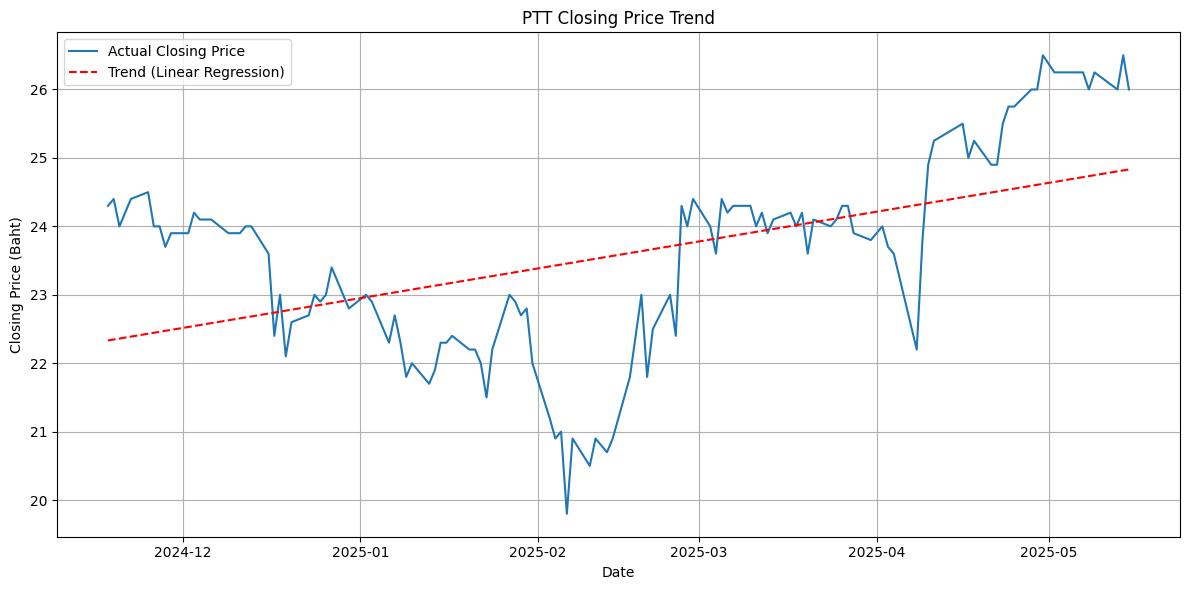

In [18]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
df_sorted = df.sort_values("วันที่")
X = df_sorted["วันที่"].map(pd.Timestamp.toordinal).values.reshape(-1, 1)
y = df_sorted["ราคาปิด"].values
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
plt.figure(figsize=(12, 6))
plt.plot(df_sorted["วันที่"], y, label="Actual Closing Price")
plt.plot(df_sorted["วันที่"], trend, label="Trend (Linear Regression)",
linestyle="--", color="red")
plt.title("PTT Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Closing Price (Baht)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()